In [14]:
from pathlib import Path

root_path = Path('results')
md_files = [file.resolve() for file in root_path.rglob('*.md')]

In [15]:
file_info = [f.name for f in md_files]
file_info = [f.replace('_algo_family_post_mapping', '_True') for f in file_info]
file_info = [f.replace('_anomaly_type_post_mapping', '_False') for f in file_info]

In [67]:
import pandas as pd

info = pd.DataFrame({
    'md_path': md_files,
    'csv_path': ['_' + '_'.join([x.split('_')[i+1] for i in range(4)]) + '_loss_evaluation.csv' for x in file_info],
    'model': [x.split('_')[1] for x in file_info],
    'input': [x.split('_')[2] for x in file_info],
    'mapping': [x.split('_')[3] for x in file_info],
    'scaling': [x.split('_')[4] for x in file_info],
    'is_post_mapping_result': [eval(x.split('_')[5].replace('.md', '')) for x in file_info]
})

info['loss_evolution'] = info.csv_path.apply(lambda x: pd.read_csv(f'results/{x}', index_col=0))

In [71]:
training_info = pd.DataFrame({
    'model': [x.split('_')[1] for x in file_info],
    'input': [x.split('_')[2] for x in file_info],
    'mapping': [x.split('_')[3] for x in file_info],
    'scaling': [x.split('_')[4] for x in file_info],
    'epoch': info.loss_evolution.apply(lambda x: x.epoch.tolist()).values,
    'train_loss': info.loss_evolution.apply(lambda x: x.train_loss.tolist()).values,
    'validation_loss': info.loss_evolution.apply(lambda x: x.val_loss.tolist()).values
}).loc[~info.is_post_mapping_result]

In [72]:
training_info

,model,input,mapping,scaling,epoch,train_loss,validation_loss
1,cnn,time-series,post-mapping,no-scaling,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[60704437.47807795, 950314.230995337, 395958.7...","[582497.7584612351, 80926.6595562801, 58449.13..."
3,cnn,time-series,post-mapping,scaled,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[2.132649066070205, 2.052655566572826, 2.02861...","[414674.16491656, 899840.4032314612, 393051.10..."
4,cnn,time-series,pre-mapping,no-scaling,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[48699370.48760985, 342287.952389152, 312248.6...","[122688.36887083232, 96696.43640972156, 175054..."
5,cnn,time-series,pre-mapping,scaled,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[1.142586483376759, 1.1000491943477635, 1.0739...","[1.0904245463697333, 1.1027171515700456, 1.069..."
7,ff,features,post-mapping,no-scaling,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[10268.564128757473, 177.82069919339528, 43.97...","[2.197355997678556, 2.2267244485123587, 2.1846..."
9,ff,features,post-mapping,scaled,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[2.0416121149189816, 1.8702177024711224, 1.729...","[1.9402942385052664, 1.8043523320484416, 3.059..."
10,ff,features,pre-mapping,no-scaling,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[11256.234755591233, 629.7781617373255, 88.351...","[278.9094499261956, 1.756279844747802, 1.30137..."
11,ff,features,pre-mapping,scaled,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[1.0909694957458624, 0.974534491082015, 0.8689...","[1.016062417106358, 0.9298078309021977, 0.8738..."
13,ff,time-series,post-mapping,no-scaling,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[2466783570.1966343, 156049414.6953056, 233703...","[43165120.27679362, 2.1888998779604347, 2.1816..."
15,ff,time-series,post-mapping,scaled,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[2.161182350347906, 2.0785418851276325, 2.0593...","[1773.3676096189329, 366.7076107458904, 67882...."


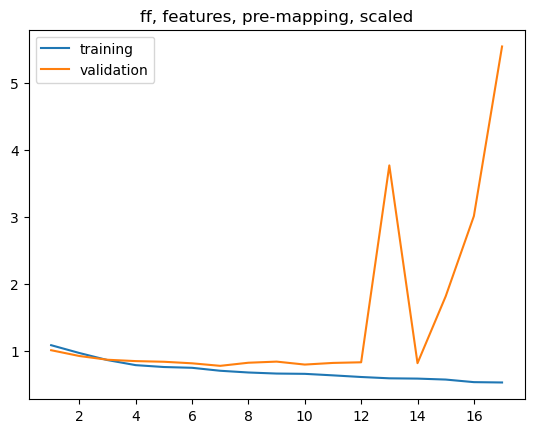

In [91]:
import matplotlib.pyplot as plt
import numpy as np

def plot_loss_curve(data, lower):
    plt.figure()
    plt.plot(data.epoch[lower:], data.train_loss[lower:], label='training')
    plt.plot(data.epoch[lower:], data.validation_loss[lower:], label='validation')
    plt.title(', '.join([data.model, data.input, data.mapping, data.scaling]))
    plt.legend()
    plt.show()
    
plot_loss_curve(training_info.loc[11], 0)

In [84]:
training_info

,model,input,mapping,scaling,epoch,train_loss,validation_loss
1,cnn,time-series,post-mapping,no-scaling,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[60704437.47807795, 950314.230995337, 395958.7...","[582497.7584612351, 80926.6595562801, 58449.13..."
3,cnn,time-series,post-mapping,scaled,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[2.132649066070205, 2.052655566572826, 2.02861...","[414674.16491656, 899840.4032314612, 393051.10..."
4,cnn,time-series,pre-mapping,no-scaling,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[48699370.48760985, 342287.952389152, 312248.6...","[122688.36887083232, 96696.43640972156, 175054..."
5,cnn,time-series,pre-mapping,scaled,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[1.142586483376759, 1.1000491943477635, 1.0739...","[1.0904245463697333, 1.1027171515700456, 1.069..."
7,ff,features,post-mapping,no-scaling,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[10268.564128757473, 177.82069919339528, 43.97...","[2.197355997678556, 2.2267244485123587, 2.1846..."
9,ff,features,post-mapping,scaled,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[2.0416121149189816, 1.8702177024711224, 1.729...","[1.9402942385052664, 1.8043523320484416, 3.059..."
10,ff,features,pre-mapping,no-scaling,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[11256.234755591233, 629.7781617373255, 88.351...","[278.9094499261956, 1.756279844747802, 1.30137..."
11,ff,features,pre-mapping,scaled,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[1.0909694957458624, 0.974534491082015, 0.8689...","[1.016062417106358, 0.9298078309021977, 0.8738..."
13,ff,time-series,post-mapping,no-scaling,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[2466783570.1966343, 156049414.6953056, 233703...","[43165120.27679362, 2.1888998779604347, 2.1816..."
15,ff,time-series,post-mapping,scaled,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[2.161182350347906, 2.0785418851276325, 2.0593...","[1773.3676096189329, 366.7076107458904, 67882...."
